In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random

In [22]:
direc = "C:/Users/parth/Desktop/New folder/2d_img"
categories = ["oring", "thumb_screw", "nuts", "machine_key", "hex_screw", "headless_screw", "gasket", "bracket", "bolt", "bearings"]

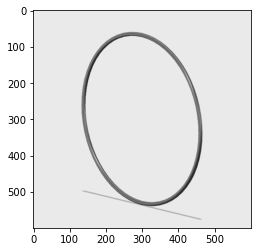

In [23]:
for category in categories:
    path = os.path.join(direc, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #remove the grayscale and show
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break    

In [24]:
print(img_array)        #This is an image matrix. Every pixel in the above image has a numerical value associated with it.

[[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]]


In [25]:
print(img_array.shape)

(600, 600)


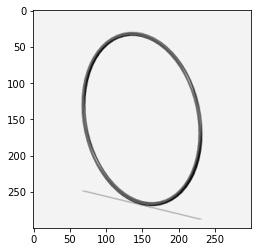

In [26]:
img_size = 300                                   
new_array = cv2.resize(img_array,(img_size,img_size))      ##resizing the image
plt.imshow(new_array, cmap = "gray")
plt.show()

In [27]:
print(new_array.shape)

(300, 300)


In [28]:
training = []                          ##labelling the data and appending the files to training list                  

def create_training_data():
    for category in categories:
        path = os.path.join(direc, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training.append([new_array, class_num])
            except Exception as e:
                print("Broken image")

create_training_data()

In [29]:
print(len(training))

1026


In [30]:
random.shuffle(training)                   #important to shuffle

In [31]:
for sample in training[:10]:
    print(sample)

[array([[237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       ...,
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237]], dtype=uint8), 0]
[array([[237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       ...,
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237]], dtype=uint8), 0]
[array([[237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       ...,
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237]], dtype=uint8), 3]
[array([[237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ...

In [32]:
x = []
y = []

In [33]:
for features, label in training:                #features in x and labels in y
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1,img_size, img_size, 1) #convert to array because cant pass list to NN
y = np.array(y)

In [34]:
import pickle

pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()